In [417]:
#To-do: to fix the order of position so that signal can be registered!! 

import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

import requests
from termcolor import colored as cl 
plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)



In [418]:
# data import 
df = pd.read_excel('Time Series Data.xlsx', index_col = 'Day')
df.head(10)


,Series 1,Series 2,Series 3,Series 4,Series 5,Series 6,Series 7,Series 8,Series 9,Series 10,Series 11,Series 12,Series 13,Series 14,Series 15,Series 16,Series 17,Series 18,Series 19,Series 20,Series 21,Series 22,Series 23,Series 24,Series 25,Series 26,Series 27,Series 28,Series 29
Day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.172920,100.589993,103.823464,98.644063,99.750482,106.614321,101.767999,100.732626,99.952576,100.227093,98.790108,100.032421,96.316754,101.460335,98.573111,100.032584,99.004063,100.390444,100.318979,101.568951,99.730607,99.673906,99.409461,99.113705,100.012563,100.311565,99.887188,96.556886,97.922078
2,98.579911,98.767737,107.058757,97.936942,99.220660,110.602917,100.681776,100.383846,99.617067,100.246064,98.754979,99.418521,99.700262,102.108065,98.256322,99.558198,98.782991,101.258255,102.048828,106.193229,101.541426,99.977798,99.577298,99.783831,99.682467,100.366287,99.902872,95.608782,100.000000
3,98.397809,97.087379,107.352843,100.000000,99.251805,113.424191,102.651998,101.569981,98.659381,101.230321,98.509591,98.384407,97.980366,100.108347,97.886884,99.018405,98.838321,100.940089,101.410870,106.936416,100.938414,99.278429,99.055138,100.875486,99.637414,100.767880,100.216365,95.109780,100.000000
4,99.051233,99.716206,105.587978,99.703996,99.407530,113.715275,100.710685,101.081407,99.760755,101.040888,96.686487,99.063150,99.663613,100.325042,98.679303,98.887350,98.340352,100.535001,101.521286,107.018993,101.448655,99.979185,99.602163,100.162127,100.379047,101.058262,100.323414,90.469062,99.480519
5,98.177450,97.318895,106.764672,99.056674,97.786202,117.800899,99.121810,98.221499,100.335509,101.097803,98.649591,97.802929,99.532723,98.918881,99.471721,98.494664,99.962949,101.663108,101.239112,95.293146,102.740313,100.693818,100.167837,99.535236,100.172412,101.234786,100.756144,87.574850,100.000000
6,97.061884,95.108290,103.529379,97.288125,96.102227,115.466257,96.960985,97.593600,98.707513,101.059860,99.719483,97.156608,97.924084,95.564820,99.154932,99.623606,100.921834,101.156924,99.116673,92.568126,100.685078,100.513425,100.491080,98.341980,98.868923,100.285086,100.409110,91.067864,97.142857
7,98.429944,96.422704,102.941207,98.820469,97.567830,113.618247,97.683150,98.116771,100.383641,101.684506,99.982435,98.061457,100.897906,96.862634,101.478646,100.654317,101.438328,100.752072,97.718071,92.568126,101.544102,100.679942,101.199726,98.767834,99.977041,101.120045,100.914686,89.071856,98.701299
8,97.860684,95.108290,103.235293,98.231451,96.725842,114.397456,97.371171,98.709605,102.873767,101.930570,100.157565,100.032421,95.344241,95.348125,102.377255,100.752548,99.962949,100.766480,97.399092,95.540875,101.900913,100.596684,101.541617,98.573281,100.360420,101.365414,101.196055,87.974052,97.662338


In [419]:
# data import: test bed  
df_bed = pd.read_excel('Test Bed.xlsx', index_col = 'Day')
df_bed.head(10)


,Market Price,Trade,Position,PnL Calc,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
Day,,,,,,,,
0.0,100.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1.0,99.976347,0.0,0.0,0.0,NaN,NaN,Profit:,399558.781171
2.0,100.147087,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3.0,100.077292,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4.0,100.048834,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5.0,99.946655,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6.0,99.936414,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7.0,100.033303,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8.0,100.129509,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [420]:
# Plot test-statistics, p-score, and cointegrated pair
# Save the pairs that has a p-score lower than 0.02

def find_cointegrated_pairs(data):
    n = len(data.axes[1])
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            tscore = result[0]
            pvalue = result[1]
            score_matrix[i, j] = tscore
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs



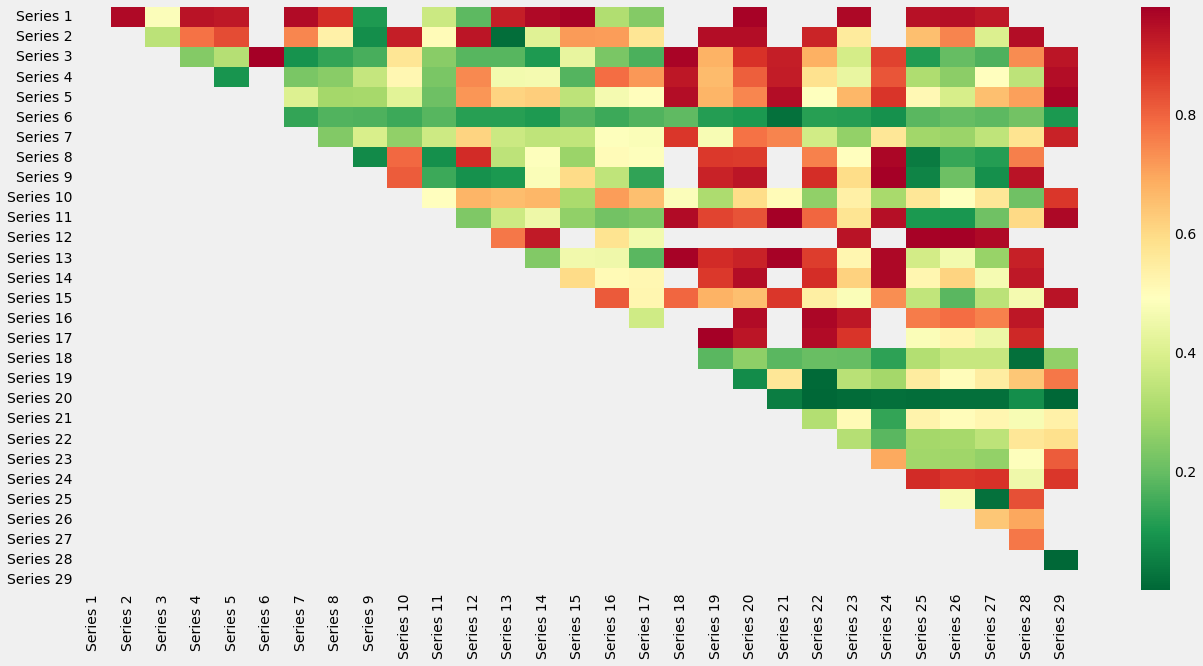

[('Series 2', 'Series 13'), ('Series 18', 'Series 28'), ('Series 19', 'Series 22'), ('Series 20', 'Series 22'), ('Series 20', 'Series 23'), ('Series 20', 'Series 24'), ('Series 20', 'Series 25'), ('Series 20', 'Series 26'), ('Series 20', 'Series 27'), ('Series 20', 'Series 29'), ('Series 28', 'Series 29')]


In [421]:
# Plot a heatmap of the p-score (the lower the better)

name = [] 
for column in df:
    name.append(column)
    
tscores, pvalues, pairs = find_cointegrated_pairs(df)
m = [0,0.2,0.4,0.6,0.8,1]
sns.heatmap(pvalues, xticklabels=name, 
                yticklabels=name, cmap='RdYlGn_r', 
                mask = (pvalues >= 0.98))
plt.show()
print(pairs)

In [422]:
# # OLDDD 

# # Trade strategy: normalise the ratio and trade based on z-score 
# # Note: profit is compared against the avereaged return from buy-and-hold of the two strategies

# def trade(S1, S2, shortMA, longMA, STD):

#     ratios = S1/ S2 
#     ratios_mavgshort = ratios.rolling(window=shortMA, center=False).mean()
#     ratios_mavglong = ratios.rolling(window=longMA, center=False).mean()
#     std_hist = ratios.rolling(window=STD, center=False).std()
#     zscore = (ratios_mavgshort - ratios_mavglong)/std_hist

#     # Start with no money and no positions
#     money = 0
#     money_list = []
#     signalS1 = []
#     signalS2 = []
#     positionS1 = []
#     positionS2 = []
    
#     for i in range(len(S1)):    
#         positionS1.append(0)
#         positionS2.append(0)
    
#     for i in range(len(ratios)):
#         if i == (len(ratios)-1) : #and (signalS1[i] != 0 or signalS2[i] != 0)
#             money += S1.iloc[i] * positionS1[i-1] + S2.iloc[i] * positionS2[i-1]
#             money_list.append(money)
#             signalS1.append(-positionS1[i-1])
#             signalS2.append(-positionS2[i-1])
#             positionS1[i] = positionS1[i-1] + signalS1[i]
#             positionS2[i] = positionS2[i-1] + signalS2[i]

#         elif zscore.iloc[i] > 1:
#             money += S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
#             money_list.append(money)
#             signalS1.append(-1)
#             signalS2.append(ratios.iloc[i])
#             positionS1[i] = positionS1[i-1] + signalS1[i]
#             positionS2[i] = positionS2[i-1] + signalS2[i]
            
#         elif zscore.iloc[i] < -1:
#             money -= S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
#             money_list.append(money)
#             signalS1.append(1)
#             signalS2.append(-ratios.iloc[i])
#             positionS1[i] = positionS1[i-1] + signalS1[i]
#             positionS2[i] = positionS2[i-1] + signalS2[i]

#         elif abs(zscore.iloc[i]) < 1:
#             money += S1.iloc[i] * positionS1[i-1] + S2.iloc[i] * positionS2[i-1]
#             money_list.append(money)
#             signalS1.append(-1*positionS1[i-1])
#             signalS2.append(-1*positionS2[i-1])
#             positionS1[i] = positionS1[i-1] + signalS1[i]
#             positionS2[i] = positionS2[i-1] + signalS2[i]

#         else:
#             money = money 
#             money_list.append(money)
#             signalS1.append(0)
#             signalS2.append(0)
#             positionS1[i] = positionS1[i-1] + signalS1[i]
#             positionS2[i] = positionS2[i-1] + signalS2[i]

#     return positionS1, positionS2, signalS1, signalS2, money, zscore, money_list, ratios
    



In [679]:
# Trade strategy: normalise the ratio and trade based on z-score 
# Note: profit is compared against the avereaged return from buy-and-hold of the two strategies

def trade(S1, S2, shortMA, longMA, STD, z_score_bound, sizing):

    ratios = S1/ S2 
    ratios_mavgshort = ratios.rolling(window=shortMA, center=False).mean()
    ratios_mavglong = ratios.rolling(window=longMA, center=False).mean()
    std_hist = ratios.rolling(window=STD, center=False).std()
    zscore = (ratios_mavgshort - ratios_mavglong)/std_hist

    # Start with no money and no positions
    money = 0
    money_list = []
    signalS1 = []
    signalS2 = []
    positionS1 = []
    positionS2 = []
    
    for i in range(len(S1)):    
        positionS1.append(0)
        positionS2.append(0)
    
    for i in range(len(ratios)):
        if i == (len(ratios)-1) : 
            money += S1.iloc[i] * positionS1[i-1] + S2.iloc[i] * positionS2[i-1]
            signalS1.append(-positionS1[i-1])
            signalS2.append(-positionS2[i-1])
  
        elif (zscore.iloc[i] > z_score_bound) and (abs(positionS1[i-1]) < 50) and (abs(positionS2[i-1]) < 50):
            money += S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
            signalS1.append(-sizing)
            signalS2.append(sizing*ratios.iloc[i])
              
        elif (zscore.iloc[i] < -z_score_bound) and (abs(positionS1[i-1]) < 50) and (abs(positionS2[i-1]) < 50):
            money -= S1.iloc[i] - S2.iloc[i] * ratios.iloc[i]
            signalS1.append(sizing)
            signalS2.append(-sizing*ratios.iloc[i])
  
        elif (abs(zscore.iloc[i]) < z_score_bound) and (positionS1[i-1] < -10):
            money += S1.iloc[i] * -10 + S2.iloc[i] * 10 * ratios.iloc[i] 
            signalS1.append(10)
            signalS2.append(-10 * ratios.iloc[i])
            
        elif (abs(zscore.iloc[i]) < z_score_bound) and (positionS1[i-1] > 10):
            money += S1.iloc[i] * 10 + S2.iloc[i] * -10 * ratios.iloc[i] 
            signalS1.append(-10)
            signalS2.append(10 * ratios.iloc[i])

        elif (abs(zscore.iloc[i]) < z_score_bound) and (positionS2[i-1] < -10):
            money += S1.iloc[i] * 10 / ratios.iloc[i] + S2.iloc[i] * -10 
            signalS1.append(-10/ ratios.iloc[i])
            signalS2.append(10)

        elif (abs(zscore.iloc[i]) < z_score_bound) and (positionS2[i-1] > 10):
            money += S1.iloc[i] * -10 / ratios.iloc[i]  + S2.iloc[i] * 10 
            signalS1.append(10/ ratios.iloc[i])
            signalS2.append(-10)
            
        elif (abs(zscore.iloc[i]) < z_score_bound) and (positionS1[i-1] > -10) and (positionS1[i-1] < 10) and (positionS2[i-1] > -10) and (positionS2[i-1] < 10):
            money += S1.iloc[i] * positionS1[i-1] + S2.iloc[i] * positionS2[i-1]
            signalS1.append(-1*positionS1[i-1])
            signalS2.append(-1*positionS2[i-1])

        else:
            money = money 
            signalS1.append(0)
            signalS2.append(0)
        
        money_list.append(money* 10000)
        positionS1[i] = positionS1[i-1] + signalS1[i]
        positionS2[i] = positionS2[i-1] + signalS2[i]

    return positionS1, positionS2, signalS1, signalS2, money, zscore, money_list, ratios
    



In [681]:
def sharpe_ratio(S1, S2, positionS1, positionS2):
    
    dailyreturnS1 = [0]
    postadj_dailyreturnS1 = []
    dailyreturnS2 = [0]
    postadj_dailyreturnS2 = []
    combinedreturn = []
    excessreturn = []
    rf_rate = 0.02

    for i in range(len(S1)-1):
        dailyreturnS1.append((S1.iloc[i+1] - S1.iloc[i])/ S1.iloc[i])
        dailyreturnS2.append((S2.iloc[i+1] - S2.iloc[i])/ S2.iloc[i])
    
    for i in range(len(S1)):
        postadj_dailyreturnS1.append(dailyreturnS1[i] * positionS1[i])
        postadj_dailyreturnS2.append(dailyreturnS2[i] * positionS2[i])
        combinedreturn.append(postadj_dailyreturnS1[i] + postadj_dailyreturnS2[i])
        excessreturn.append(combinedreturn[i] - rf_rate)
    sharpe = ((np.mean(excessreturn)) / np.std(excessreturn)) * (256 ** 0.5)
    return sharpe


In [682]:
key = 'Series 18'
value = 'Series 28'

for i in range(0, 10, 1):
    i = i
    gain = trade(df[key].iloc[:], df[value].iloc[:], 10, 65, 65, 0.95, i)
    sharpe = sharpe_ratio(df[key], df[value], gain[0], gain[1])
    print(f"{i}: {sharpe}")


0: -4.6116860184273864e+16
1: 0.6979124944112896
2: 0.9597209545910382
3: 0.9712947508410935
4: 0.8640624867708088
5: 0.9178258331075321
6: 0.6679302181993777
7: 0.9886336926741134
8: 0.8839717692691383
9: 0.6146316870961843


In [683]:
# Backtest for the any duration: 

for key, value in pairs :
    print (key, value) 
    gain = trade(df[key].iloc[:], df[value].iloc[:], 10, 65, 65, 0.95, 3)
    sharpe = sharpe_ratio(df[key].iloc[:], df[value].iloc[:], gain[0], gain[1])
    print(sharpe)
    print(gain[4]*10000)


Series 2 Series 13
-1.4198568782934495
-1813198713.7163422
Series 18 Series 28
0.9712947508410935
307393227.73001283
Series 19 Series 22
-0.6433117467548283
-5286379.746955698
Series 20 Series 22
-0.010023657162013101
27865955.346907273
Series 20 Series 23
-0.033341495547167754
32271034.454360798
Series 20 Series 24
0.22158367039374524
44811923.852590226
Series 20 Series 25
-0.02086449172419956
24629950.52150865
Series 20 Series 26
0.083656158290385
38627861.17686869
Series 20 Series 27
0.22603959570555754
42296054.7091471
Series 20 Series 29
0.06585563282169372
38563234.67144846
Series 28 Series 29
0.3341563820674627
174353460.30980426


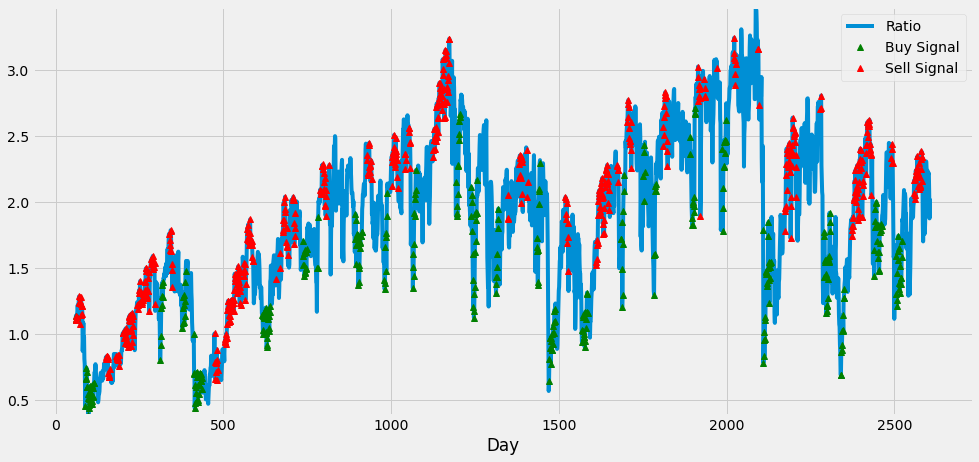

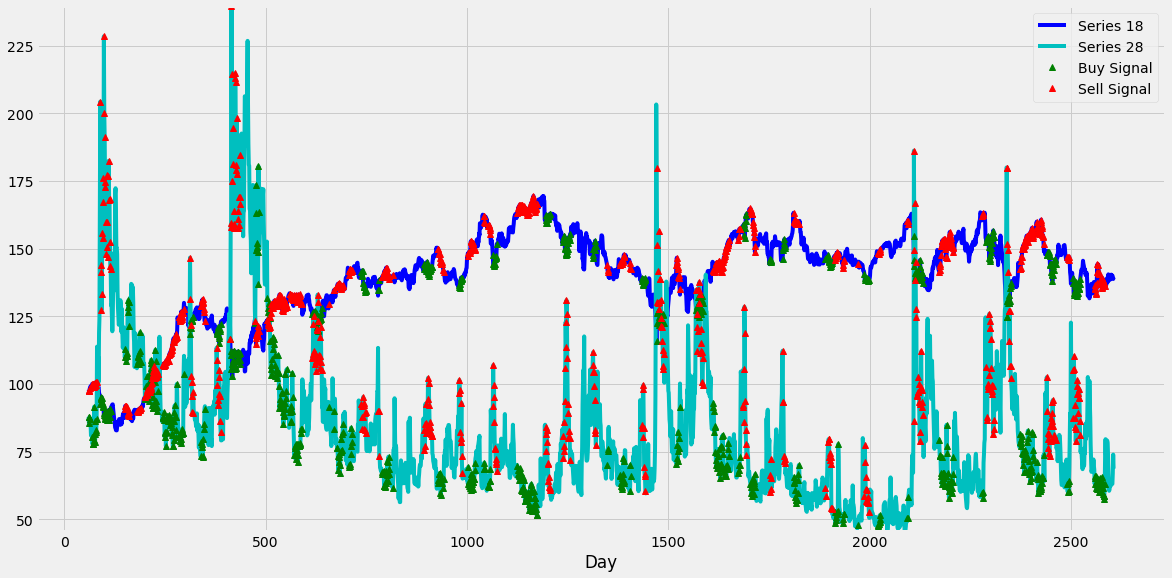

In [661]:
# Graph Plotting
pair1 = 'Series 18'
pair2 = 'Series 28'
ratios = df[pair1] / df[pair2]
test_period = ratios[:]


# Plot the ratios and buy and sell signals from z score
gain = trade(df[pair1].iloc[:], df[pair2].iloc[:], 10, 65, 65, 0.95, 3)
profit_v = PnL(df[pair1].iloc[:], df[pair2].iloc[:], gain[4])
sharpe = sharpe_ratio(df[pair1].iloc[:], df[pair2].iloc[:], gain[0], gain[1])

plt.figure(figsize=(15,7))
test_period[60:].plot()
buy = test_period.copy()
sell = test_period.copy()
buy[gain[5]>-1] = 0
sell[gain[5]<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = df[pair1].iloc[:]
S2 = df[pair2].iloc[:]
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()


# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['Series 18','Series 28', 'Buy Signal', 'Sell Signal'])
plt.show()

Series 2 " and " Series 13 "has a sharpe of" -1.4198568782934495 and a profit of -1813198713.7163422
Series 18 " and " Series 28 "has a sharpe of" 0.9712947508410935 and a profit of 307393227.73001283
Series 19 " and " Series 22 "has a sharpe of" -0.6433117467548283 and a profit of -5286379.746955698
Series 20 " and " Series 22 "has a sharpe of" -0.010023657162013101 and a profit of 27865955.346907273
Series 20 " and " Series 23 "has a sharpe of" -0.033341495547167754 and a profit of 32271034.454360798
Series 20 " and " Series 24 "has a sharpe of" 0.22158367039374524 and a profit of 44811923.852590226
Series 20 " and " Series 25 "has a sharpe of" -0.02086449172419956 and a profit of 24629950.52150865
Series 20 " and " Series 26 "has a sharpe of" 0.083656158290385 and a profit of 38627861.17686869
Series 20 " and " Series 27 "has a sharpe of" 0.22603959570555754 and a profit of 42296054.7091471
Series 20 " and " Series 29 "has a sharpe of" 0.06585563282169372 and a profit of 38563234.67

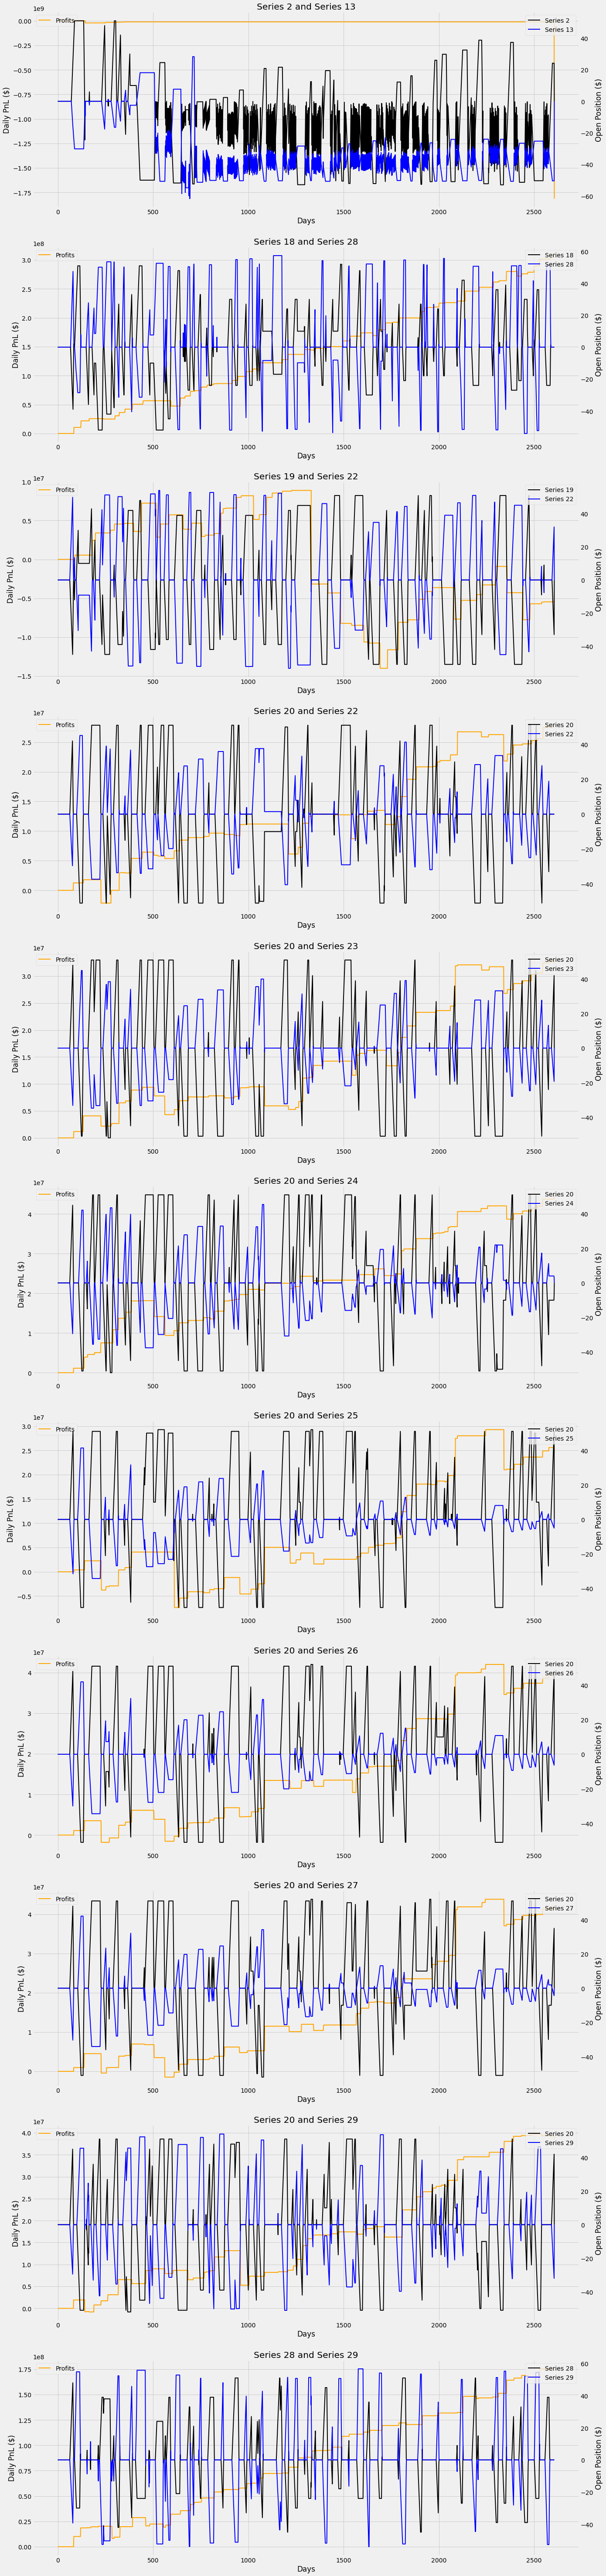

In [664]:
# Plotting

money_df = pd.DataFrame()
positionS1_df = pd.DataFrame()
positionS2_df = pd.DataFrame()
count = 0

# lower and upper bound of test range 
lb = 0
ub = len(df)

for key, value in pairs :
    count += 1
    gain = trade(df[key].iloc[:], df[value].iloc[:], 10, 65, 65, 0.95, 3)
    profit_v = PnL(df[key].iloc[:], df[value].iloc[:], gain[4])
    money_df[key + ' (' + str(count) + ')'] = gain[6]
    positionS1_df[key + ' (' + str(count) + ')'] = gain[0]
    positionS2_df[key + ' (' + str(count) + ')'] = gain[1]
    sharpe = sharpe_ratio(df[key].iloc[:], df[value].iloc[:], gain[0], gain[1])

    print(f'{key} " and " {value} "has a sharpe of" {sharpe} and a profit of {gain[4]*10000}' )


fig, axs = plt.subplots(nrows = len(pairs) , figsize=(20, 100))

for i in range(len(pairs)):
    axs[i].plot(df.index[lb:ub], money_df.iloc[lb:ub, i], linewidth=2, label='Profits', color='orange')
    ax2 = axs[i].twinx()
    ax2.plot(df.index[lb:ub], positionS1_df.iloc[lb:ub, i], linewidth=2, label=pairs[i][0], color='black')
    ax2.plot(df.index[lb:ub], positionS2_df.iloc[lb:ub, i], linewidth=2, label=pairs[i][1], color='blue')
    axs[i].set_title(pairs[i][0] + ' and ' + pairs[i][1])
    axs[i].set_xlabel('Days')
    ax2.set_ylabel('Open Position ($)')
    axs[i].set_ylabel('Daily PnL ($)')
    ax2.grid(False)
    axs[i].legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.show()

                      
#     return positionS1, positionS2, signalS1, signalS2, money, zscore, money_list, ratios





In [623]:
# Return for all pairs: 

profit_df = pd.DataFrame(columns = df.columns)
n = df.shape[1]

for i in range(n):
    profit = []
    for x in range(0,i+1):
        profit.insert(0, 0)
    for j in range(i+1, n):
        S1 = df[df.columns[i]]
        S2 = df[df.columns[j]]
        gain = trade(S1.iloc[:], S2.iloc[:], 5, 60, 60, 0.9)
        sharpe = sharpe_ratio(df[key].iloc[:], df[key].iloc[:], gain[0], gain[1])
        profit.append(sharpe)
   
    profits_df = pd.DataFrame(columns = df.columns).transpose()
    profits_df[i] = profit
    profits_df = profits_df.transpose()
    profit_df = pd.concat([profit_df, profits_df])

profit_df.to_excel(r'/Users/halelee/Python/BH Algo/PythonResult.xlsx', sheet_name='Sheet1', index = False)


